# Q-Learning (Crawling Robot)

#### References
* https://www.youtube.com/watch?v=F-kNXAFeffs
* https://www.youtube.com/watch?v=bVbT9zkPIvs
* https://github.com/Rosebotics/ev3dev-curriculum

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from crawler_lego_env import CrawlingRobotEnv
from agent import Q_Agent

try:
    from pybricks.tools import print
    running_on_lego = True
except ModuleNotFoundError:
    running_on_lego = False

# Number seem to converge in simulation
num_iterations_train = 300
# Bigger values decay faster
e_greedy_decay = 1. / num_iterations_train
initial_e_greedy_prob = 1.0

#### Create Environment

In [2]:
env = CrawlingRobotEnv(invert_reward=False, run_on_lego=running_on_lego, step_angle=45)
current_state = env.reset()

### Action and State space before training

In [7]:
# Get the action space
print('Robot action space:', env.action_space)
print('Robot state-space:', env.observation_space)
print('Reset State:', current_state)

Robot action space: 6
Robot state-space: 9
Reset State: 0


#### Create Agent

In [8]:
agent = Q_Agent(env, gamma=0.9, alpha=0.2, e_greedy_prob=initial_e_greedy_prob, e_greedy_decay=e_greedy_decay)

##### Agent Internal Action-Space table

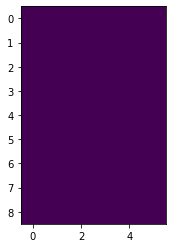

In [9]:
plt.imshow(agent.q_val_table)
plt.show()

#### Training

In [10]:
# Train
for steps in range(num_iterations_train):
    action = agent.choose_action(current_state)
    current_state_str = str(env)
    next_state, reward, done, info = env.step(action)
    next_state_str = env.state_idx_to_str(next_state)
    action_str = env.action_idx_to_str(action)
    agent.update_q_table(current_state, action, reward, next_state)
    print('steps:', steps, '\n\tcurrent_state:', current_state_str, '\n\tACTION:', action_str, '\n\tnext_state:',
          next_state_str, '\n\treward:', reward, '\nprob:', agent.e_greedy_prob)
    print('-' * 20)
    # Don't forget to update your state otherwise the robot will be stuck
    current_state = next_state

steps: 0 
	current_state: leg:NEUTRAL feet:NEUTRAL 
	ACTION: leg NEUTRAL idx:0 
	next_state: leg:NEUTRAL feet:NEUTRAL 
	reward: -20 
prob: 0.9966666666666667
--------------------
steps: 1 
	current_state: leg:NEUTRAL feet:NEUTRAL 
	ACTION: feet NEUTRAL idx:3 
	next_state: leg:NEUTRAL feet:NEUTRAL 
	reward: -20 
prob: 0.9933444444444445
--------------------
steps: 2 
	current_state: leg:NEUTRAL feet:NEUTRAL 
	ACTION: feet NEUTRAL idx:3 
	next_state: leg:NEUTRAL feet:NEUTRAL 
	reward: -20 
prob: 0.9900332962962963
--------------------
steps: 3 
	current_state: leg:NEUTRAL feet:NEUTRAL 
	ACTION: leg NEUTRAL idx:0 
	next_state: leg:NEUTRAL feet:NEUTRAL 
	reward: -20 
prob: 0.9867331853086421
--------------------
steps: 4 
	current_state: leg:NEUTRAL feet:NEUTRAL 
	ACTION: leg DOWN idx:2 
	next_state: leg:DOWN feet:NEUTRAL 
	reward: -1 
prob: 0.9834440746909466
--------------------
steps: 5 
	current_state: leg:DOWN feet:NEUTRAL 
	ACTION: feet UP idx:4 
	next_state: leg:DOWN feet:UP 
	rewar

#### Action-Space after training

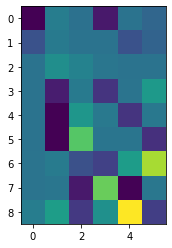

In [11]:
plt.imshow(agent.q_val_table)
plt.show()

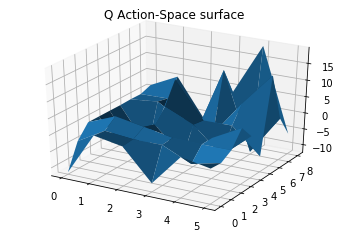

In [12]:
# Convert 2D list to numpy array
q_val_table = np.array(agent.q_val_table)
nx, ny = q_val_table.shape[1], q_val_table.shape[0]
x = range(nx)
y = range(ny)
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ha.plot_surface(X, Y, q_val_table)
plt.title('Q Action-Space surface')
plt.show()

#### Evaluate

In [13]:
agent.e_greedy_prob = 0
sum_rewards = 0
num_steps_eval = 20
for steps in range(num_steps_eval):
    # Greedly run actions without learn anymore
    current_state_str = str(env)
    action = agent.choose_action(current_state)
    next_state, reward, done, info = env.step(action)
    action_str = env.action_idx_to_str(action)
    next_state_str = env.state_idx_to_str(next_state)
    print('steps:', steps, '\n\tcurrent_state:', current_state_str, '\n\tACTION:', action_str, '\n\tnext_state:',
          next_state_str, '\n\treward:', reward, '\nprob:', agent.e_greedy_prob)
    print('-' * 20)
    sum_rewards += reward
    # Don't forget to update your state otherwise the robot will be stuck
    current_state = next_state
print('Sum of rewards in %d steps: %d' % (num_steps_eval, sum_rewards))

steps: 0 
	current_state: leg:DOWN feet:UP 
	ACTION: feet NEUTRAL idx:3 
	next_state: leg:DOWN feet:NEUTRAL 
	reward: 0 
prob: 0
--------------------
steps: 1 
	current_state: leg:DOWN feet:NEUTRAL 
	ACTION: feet DOWN idx:5 
	next_state: leg:DOWN feet:DOWN 
	reward: 0 
prob: 0
--------------------
steps: 2 
	current_state: leg:DOWN feet:DOWN 
	ACTION: feet UP idx:4 
	next_state: leg:DOWN feet:UP 
	reward: 10 
prob: 0
--------------------
steps: 3 
	current_state: leg:DOWN feet:UP 
	ACTION: feet NEUTRAL idx:3 
	next_state: leg:DOWN feet:NEUTRAL 
	reward: 0 
prob: 0
--------------------
steps: 4 
	current_state: leg:DOWN feet:NEUTRAL 
	ACTION: feet DOWN idx:5 
	next_state: leg:DOWN feet:DOWN 
	reward: 0 
prob: 0
--------------------
steps: 5 
	current_state: leg:DOWN feet:DOWN 
	ACTION: feet UP idx:4 
	next_state: leg:DOWN feet:UP 
	reward: 10 
prob: 0
--------------------
steps: 6 
	current_state: leg:DOWN feet:UP 
	ACTION: feet NEUTRAL idx:3 
	next_state: leg:DOWN feet:NEUTRAL 
	reward